In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense,LSTM
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pylab as plt
import tensorflow as tf
from tensorflow.keras.layers import Reshape
from sklearn.utils import resample
from sklearn.preprocessing import Normalizer
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding

In [2]:
df1=pd.read_csv("D:\\Downloads\\CIC2018\\Friday-02-03-2018_TrafficForML_CICFlowMeter.csv")

In [3]:
df2=pd.read_csv("D:\\Downloads\\CIC2018\\Friday-16-02-2018_TrafficForML_CICFlowMeter.csv",low_memory=False)

In [4]:
df3=pd.read_csv("D:\\Downloads\\CIC2018\\Friday-23-02-2018_TrafficForML_CICFlowMeter.csv")

In [5]:
#df4=pd.read_csv("D:\\Downloads\\CIC2018\\Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv")

In [6]:
df5=pd.read_csv("D:\\Downloads\\CIC2018\\Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv",low_memory=False)

In [7]:
df6=pd.read_csv("D:\\Downloads\\CIC2018\\Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv")

In [8]:
df7=pd.read_csv("D:\\Downloads\\CIC2018\\Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv")

In [9]:
df8=pd.read_csv("D:\\Downloads\\CIC2018\\Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv")

In [10]:
df9=pd.read_csv("D:\\Downloads\\CIC2018\\Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv")

In [11]:
df10=pd.read_csv("D:\\Downloads\\CIC2018\\Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv",low_memory=False)

In [12]:
# Randomly select 20% of data
df11 = df1.sample(frac=0.2, random_state=42)
df22 = df2.sample(frac=0.2, random_state=42)
df33 = df3.sample(frac=0.2, random_state=42)
#df44 = df4.sample(frac=0.2, random_state=42)
df55 = df5.sample(frac=0.2, random_state=42)
df66 = df6.sample(frac=0.2, random_state=42)
df77 = df7.sample(frac=0.2, random_state=42)
df88 = df8.sample(frac=0.2, random_state=42)
df99 = df9.sample(frac=0.2, random_state=42)
df100 = df10.sample(frac=0.2, random_state=42)

In [13]:
dfs=[df11,df22,df33,df55,df66,df77,df88,df99,df100]

In [14]:
combined_df=pd.concat(dfs,ignore_index=True)

In [15]:
combined_df['Label'].value_counts()

Benign                      1222143
DDOS attack-HOIC             137262
DoS attacks-Hulk              92328
Bot                           57298
FTP-BruteForce                38689
SSH-Bruteforce                37629
Infilteration                 32395
DoS attacks-SlowHTTPTest      27994
DoS attacks-GoldenEye          8330
DoS attacks-Slowloris          2214
DDOS attack-LOIC-UDP            370
Brute Force -Web                117
Brute Force -XSS                 49
SQL Injection                    20
Label                            13
Name: Label, dtype: int64

In [16]:
combined_df.shape

(1656851, 80)

In [17]:
combined_df.dropna()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,53,17,02/03/2018 08:56:19,227,1,1,37,53.0,37,37,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,443,6,02/03/2018 04:07:21,521,3,0,77,0.0,46,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,50434,6,02/03/2018 10:33:31,27,1,1,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,53,17,02/03/2018 04:58:37,250,1,1,40,56.0,40,40,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,53959,6,02/03/2018 11:26:31,86135655,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,86100000.0,0.0,86100000.0,86100000.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656846,445,6,28/02/2018 11:12:26,252242,5,4,286,170,103,0,...,20,0,0,0,0,0,0,0,0,Infilteration
1656847,80,6,28/02/2018 09:33:52,22,1,1,0,0,0,0,...,20,0,0,0,0,0,0,0,0,Benign
1656848,135,6,28/02/2018 02:29:50,2943821,4,4,336,24,168,0,...,20,0,0,0,0,0,0,0,0,Benign
1656849,53,17,28/02/2018 09:24:02,210,1,1,50,178,50,50,...,8,0,0,0,0,0,0,0,0,Benign


In [18]:
combined_df=combined_df.drop(columns='Timestamp',axis=1)

In [19]:
#converting into numerical and creating different classes of target variable 
#label_encoder=LabelEncoder()
#combined_df['Label']= label_encoder.fit_transform(combined_df['Label'])
#combined_df['Label'].unique()

In [20]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Label' column in the combined_df dataframe
combined_df['Label'] = label_encoder.fit_transform(combined_df['Label'])

# Replace the encoded values for all classes other than 'Benign' with 1
combined_df['Label'] = combined_df['Label'].apply(lambda x: 1 if x != 0 else 0)

# Print the unique values in the 'Label' column after encoding
#print(combined_df['Label'].unique())


In [21]:
combined_df['Label'].value_counts()

0    1222143
1     434708
Name: Label, dtype: int64

In [22]:
for col in combined_df.columns[:-1]:
    combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')

In [23]:
#Function to remove infinity,nan and other values
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [24]:
combined_df=clean_dataset(combined_df)

In [25]:
X=combined_df.drop(columns='Label',axis=1)
Y=combined_df['Label']

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=2)

In [27]:
rfc=RandomForestClassifier(random_state=0)

In [28]:
rfc.fit(X,Y)

RandomForestClassifier(random_state=0)

In [29]:
imp=rfc.feature_importances_

In [30]:
mean_importance=imp.mean()#Mean of importance feature 
print("Mean Importance is :",mean_importance)

Mean Importance is : 0.012820512820512818


In [31]:
feature_importance=list(zip(X.columns,imp))#Creating tuple with features and its important

In [32]:
feature_importance.sort(key=lambda x: x[1],reverse=True)#Sorting in decending order

In [33]:
selected_features = [feature for feature, importance in feature_importance if importance > mean_importance]#Selecting only features greater than mean_importance

In [34]:
selected_importances = [imp[X.columns.get_loc(feature)] for feature in selected_features]#list contains the importance of seleced_features only

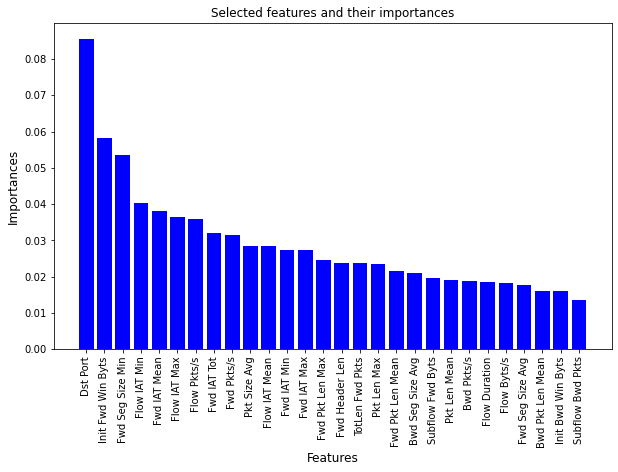

In [35]:
#plotting the graph
fig,axs=plt.subplots(figsize=(10,6))
axs.bar(selected_features,selected_importances,color='b')
plt.xticks(rotation=90,fontsize=10)
plt.xlabel("Features",fontsize=12)
plt.ylabel("Importances",fontsize=12)
plt.title("Selected features and their importances")
#note = "This plot shows the feature importances\nof the selected features."
#plt.text(0.5, 1.05, note, horizontalalignment='center', fontsize=12, transform=ax.transAxes)
#to save figure as img and pdf
DPI=300
#plt.savefig("feature_importnaces.png",dpi=DPI,bbox_inches='tight')
plt.savefig("feature_importances.pdf",dpi=300,bbox_inches='tight')
plt.show()

In [36]:
#create a new df with only selected_features
newX=combined_df[selected_features]

In [37]:
#split the newx into train and test split
X_train,X_test,Y_train,Y_test=train_test_split(newX,Y,test_size=0.2,random_state=2)

In [38]:
#Normalizing the X_train and transform back to X_train
scaler=Normalizer().fit(X_train)
X_train=scaler.transform(X_train)
np.set_printoptions(precision=3)

In [39]:
#Normalizing the X_test and transform back into X_test
scaler=Normalizer().fit(X_test)
X_test=scaler.transform(X_test)
np.set_printoptions(precision=3)

In [40]:
#one-hot encoded matrix: (label as [1,0,1,0]) into [[0,1],[1,0],[0,1],[1,0]]
y_train=to_categorical(Y_train,num_classes=2)
y_test=to_categorical(Y_test,num_classes=2)

In [41]:
#Converting input data into 3D tensor with time_step=1, RNN takes 3D tensor as input
x_train=X_train.reshape(len(X_train), X_train.shape[1], 1)
x_test=X_test.reshape(len(X_test), X_test.shape[1], 1)

In [42]:
#same as above but time_step in second position : which can be more convenient when working with RNNs that have multiple layers
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [43]:
#the number of training examples that are processed in a single iteration of the algorithm
batch_size=32

In [44]:
model=Sequential()#initializing sequential model
model.add(GRU(60,input_dim=28,return_sequences=True))#Adds GRU layer of 60 units(layers i.e processing nodes or neurons) and return sequence rather than single value
model.add(Dropout(0.1))#dropout prevents overfitting,A dropout rate of 0.1 means that 10% of the neurons in the layer will be randomly dropped out during each training iteration.
model.add(Dense(2,activation='sigmoid'))# it adds dense layer to model which is used to transform the output of the previous layers into a prediction.
model.add(GRU(196,return_sequences=False))#Adds GRU layer of 196 units and it return single value
model.add(Dropout(0.1))#Drops 10% of neurons randomly 
model.add(Dense(2,activation='sigmoid'))#gives the final output 

In [45]:
#using binary_crossentropy loss function which is common in binary classification problems
#using adam as optimizer which adapts learning rate during training  and updating models weight
#using accuracy metrice for evaluating the performance of model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [46]:
#train model with epoch 10
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=10,validation_data=[x_test,y_test])

Epoch 1/10
41237/41237 [==============================] - 382s 9ms/step - loss: 0.2043 - accuracy: 0.9399 - val_loss: 0.1669 - val_accuracy: 0.9571
Epoch 2/10
41237/41237 [==============================] - 405s 10ms/step - loss: 0.1572 - accuracy: 0.9588 - val_loss: 0.1362 - val_accuracy: 0.9641
Epoch 3/10
41237/41237 [==============================] - 410s 10ms/step - loss: 0.1342 - accuracy: 0.9657 - val_loss: 0.1198 - val_accuracy: 0.9695
Epoch 4/10
41237/41237 [==============================] - 414s 10ms/step - loss: 0.1239 - accuracy: 0.9683 - val_loss: 0.1159 - val_accuracy: 0.9705
Epoch 5/10
41237/41237 [==============================] - 406s 10ms/step - loss: 0.1200 - accuracy: 0.9692 - val_loss: 0.1133 - val_accuracy: 0.9707
Epoch 6/10
41237/41237 [==============================] - 407s 10ms/step - loss: 0.1153 - accuracy: 0.9702 - val_loss: 0.1076 - val_accuracy: 0.9722
Epoch 7/10
41237/41237 [==============================] - 413s 10ms/step - loss: 0.1135 - accuracy: 0.9707 

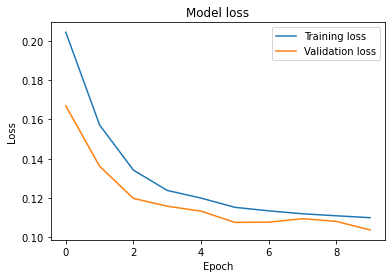

In [47]:
# Plot the training and validation loss over the course of training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
#saving the figure
DPI=300
plt.savefig("Model loss.pdf",dpi=DPI,bbox_inches='tight')
plt.show()

In [48]:
#save model
#tf.keras.models.save_model(history,'NIDS_Model.h5')
tf.keras.models.save_model(model,"NIDS_model.h5")

In [49]:
#load the model
from keras.models import load_model
loaded_model=load_model("NIDS_model.h5")

In [50]:
#Evaluating accuracy score
from sklearn.metrics import accuracy_score

In [51]:
#prediction on test dataset
y_pred=loaded_model.predict(x_test)

10310/10310 [==============================] - 38s 4ms/step


In [52]:
#np.argmax() can be used to convert the probabilities into class predictions
y_pred = np.argmax(y_pred,axis=1)

In [53]:
#Converting y_test into class prediction
y_test_class=np.argmax(y_test,axis=1)

In [54]:
#importing library which are required for evaluation metrics
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [55]:
accuracy=accuracy_score(y_test_class,y_pred)
precision=precision_score(y_test_class,y_pred)
recall=recall_score(y_test_class,y_pred)
f1=f1_score(y_test_class,y_pred)

In [56]:
#calculating confusion metrics
cm=confusion_matrix(y_test_class,y_pred)

In [57]:
tp = cm[1, 1]
tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]

# Print the results 
print(f"True positive (TP): {tp}")
print(f"True negative (TN): {tn}")
print(f"False positive (FP): {fp}")
print(f"False negative (FN): {fn}")

True positive (TP): 78713
True negative (TN): 242385
False positive (FP): 523
False negative (FN): 8275


In [58]:
#In term of rate 
tpr=tp/(tp+fn)#recall
tnr=tn/(tn+fp)
fpr=fp/(fp+tn)#False alarm rate
fnr=fn/(tp+tn)

In [59]:
print("True positive rate is:",tpr)
print("True Negative rate is:",tnr)
print("False positive rate is:",fpr)
print("False positive rate is:",fnr)


True positive rate is: 0.9048719363590381
True Negative rate is: 0.9978469214682102
False positive rate is: 0.0021530785317898132
False positive rate is: 0.025770948433188622


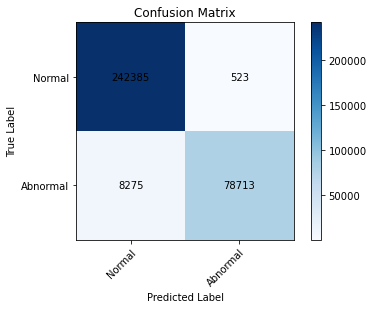

In [60]:
# Define the class labels
class_labels = ['Normal', 'Abnormal']

# Plot the confusion matrix as a figure
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Show all ticks
ax.set_xticks(np.arange(len(class_labels)))
ax.set_yticks(np.arange(len(class_labels)))

# Label the ticks
ax.set_xticklabels(class_labels)
ax.set_yticklabels(class_labels)

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        text = ax.text(j, i, cm[i, j], ha="center", va="center", color="black")

# Set title and axis labels
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")

# Save the figure
plt.savefig('confusion_matrix.pdf',dpi=300,bbox_inches='tight')

In [61]:
selected_features

['Dst Port',
 'Init Fwd Win Byts',
 'Fwd Seg Size Min',
 'Flow IAT Min',
 'Fwd IAT Mean',
 'Flow IAT Max',
 'Flow Pkts/s',
 'Fwd IAT Tot',
 'Fwd Pkts/s',
 'Pkt Size Avg',
 'Flow IAT Mean',
 'Fwd IAT Min',
 'Fwd IAT Max',
 'Fwd Pkt Len Max',
 'Fwd Header Len',
 'TotLen Fwd Pkts',
 'Pkt Len Max',
 'Fwd Pkt Len Mean',
 'Bwd Seg Size Avg',
 'Subflow Fwd Byts',
 'Pkt Len Mean',
 'Bwd Pkts/s',
 'Flow Duration',
 'Flow Byts/s',
 'Fwd Seg Size Avg',
 'Bwd Pkt Len Mean',
 'Init Bwd Win Byts',
 'Subflow Bwd Pkts']

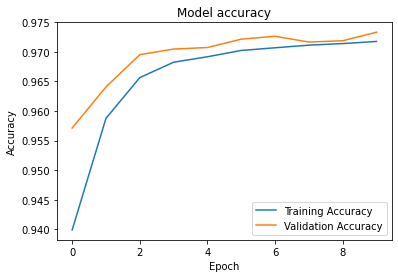

In [64]:
# Plot the training and validation accuracy over the course of training
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
#saving the figure
DPI=300
plt.savefig("Model Accuracy.pdf",dpi=DPI,bbox_inches='tight')
plt.show()